In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timezone, timedelta
from io import StringIO
import geohash2
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
# Gloabl seaborn Theme
sns.set_theme(style="whitegrid", palette="pastel")
import import_ipynb
import pm25_nowcast_aqi as aqi

importing Jupyter notebook from pm25_nowcast_aqi.ipynb
PM25: 35.9 AQI: 102


## Extraction - AQI Last 24 Hours

In [2]:
# Kedro Catalog
pm25_last_24h = catalog.load('pm25_last_24h')
# Data Frame Sensors
pm25_last_24h.head()

2022-09-10 16:56:54,400 - kedro.io.data_catalog - INFO - Loading data from `pm25_last_24h` (CSVDataSet)...


,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-06 13:34:30-05:00,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181


In [3]:
# Check Data Types
pm25_last_24h.dtypes

DATETIME         object
TANGARA_2BBA    float64
TANGARA_14D6    float64
TANGARA_1CE2    float64
TANGARA_1FCA    float64
TANGARA_2492    float64
TANGARA_2FF6    float64
TANGARA_48C6    float64
TANGARA_4D7A    float64
TANGARA_532E    float64
TANGARA_EA06    float64
TANGARA_F1AE    float64
TANGARA_FAC6    float64
TANGARA_06BE    float64
dtype: object

In [4]:
# Data Frame AQI Last 24 Hours
aqi_last_24h = aqi.pm25_to_aqi(pm25_last_24h)
aqi_last_24h.head()

,DATETIME,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
0,2022-09-06 13:34:30-05:00,71,77,79,86,82,82,60,24,60,94,86,71,80


In [5]:
# Describe Data
pm25_last_24h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
25%,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
50%,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
75%,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181
max,21.311531,24.221313,25.219702,28.575207,26.671584,26.544354,16.3258,5.629239,16.243923,32.156095,28.329522,21.448278,25.655181


In [6]:
# Describe Data
aqi_last_24h.describe()

,TANGARA_2BBA,TANGARA_14D6,TANGARA_1CE2,TANGARA_1FCA,TANGARA_2492,TANGARA_2FF6,TANGARA_48C6,TANGARA_4D7A,TANGARA_532E,TANGARA_EA06,TANGARA_F1AE,TANGARA_FAC6,TANGARA_06BE
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0
25%,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0
50%,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0
75%,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0
max,71.0,77.0,79.0,86.0,82.0,82.0,60.0,24.0,60.0,94.0,86.0,71.0,80.0


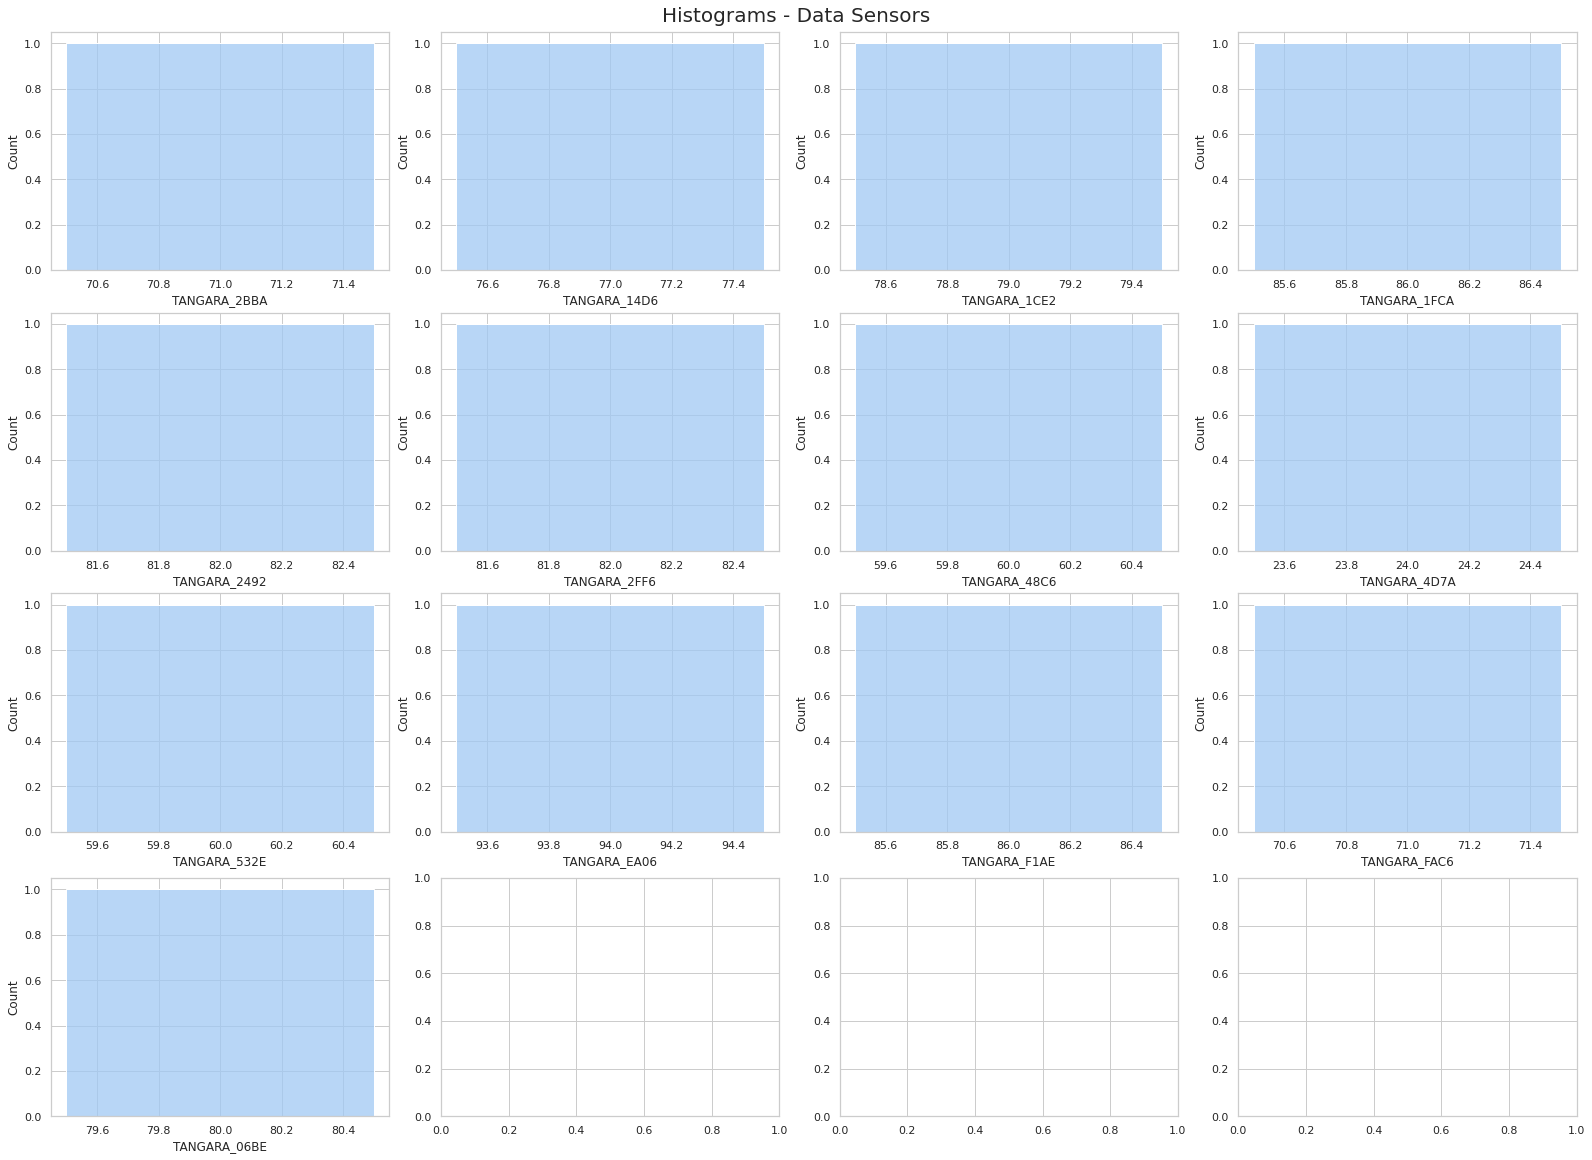

In [7]:
# Plot Histograms
aqi.histplots(aqi_last_24h)

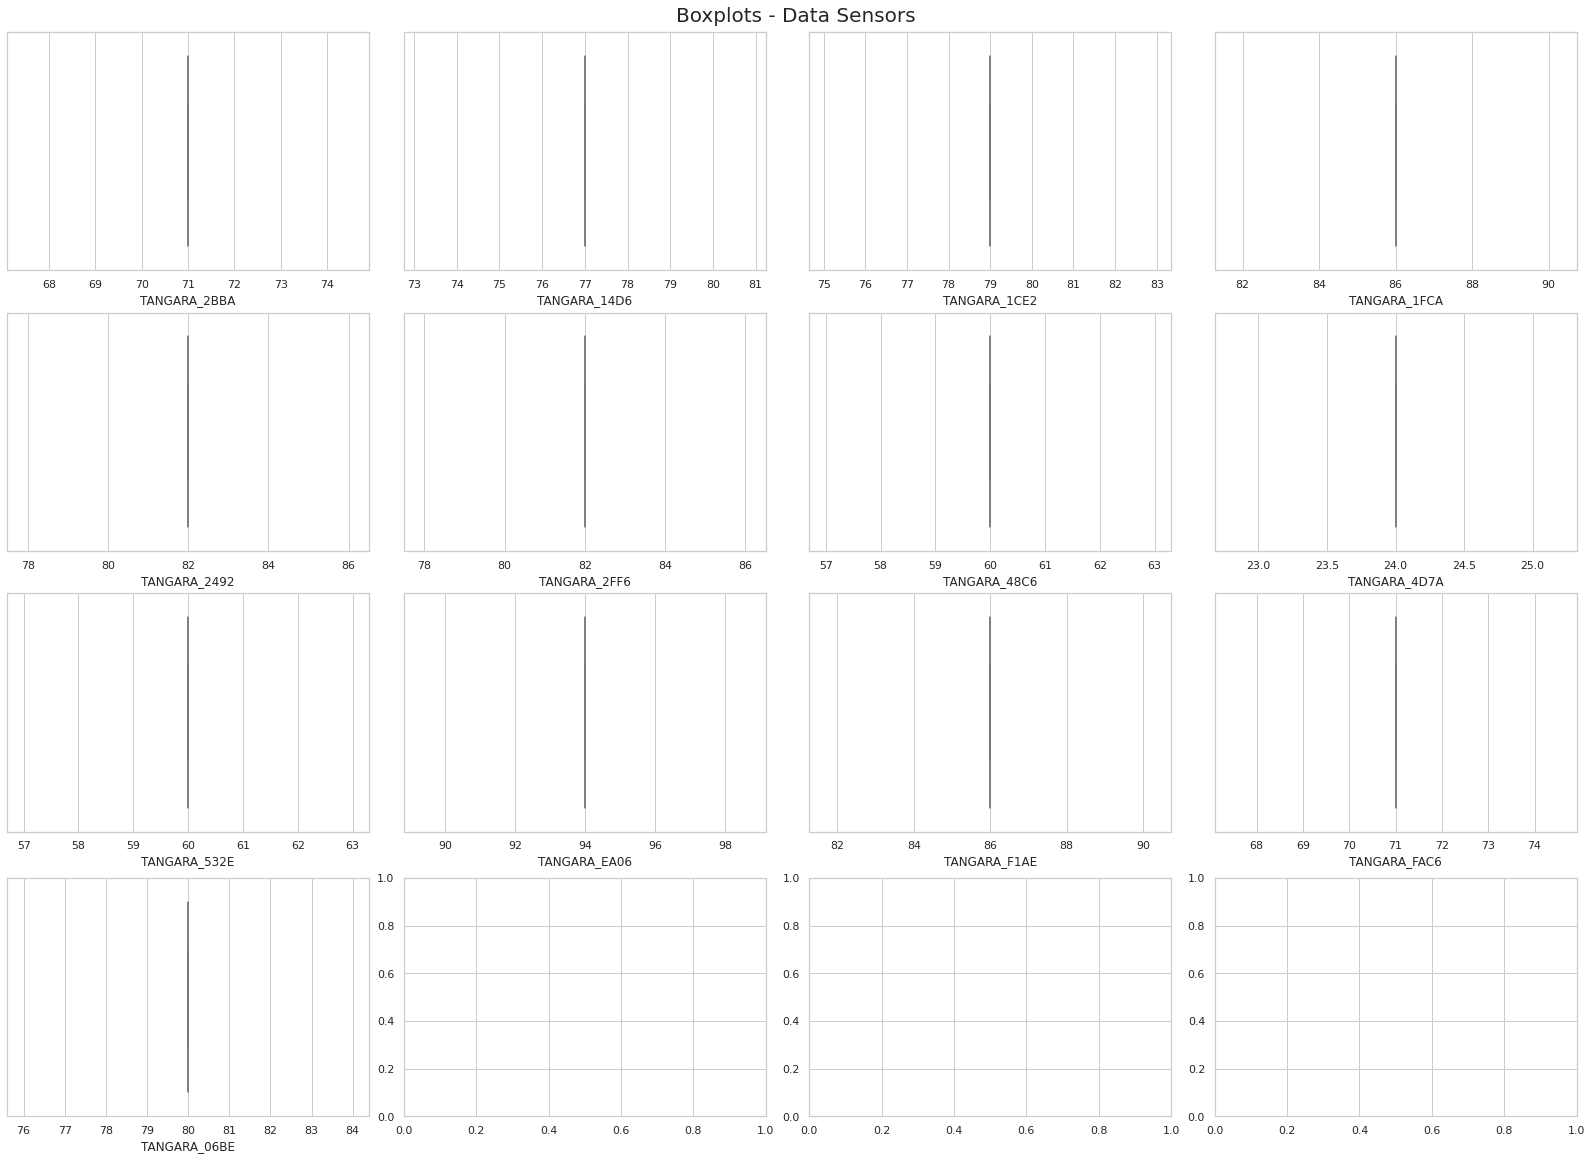

In [8]:
# Plot Boxplots
aqi.boxplots(aqi_last_24h)

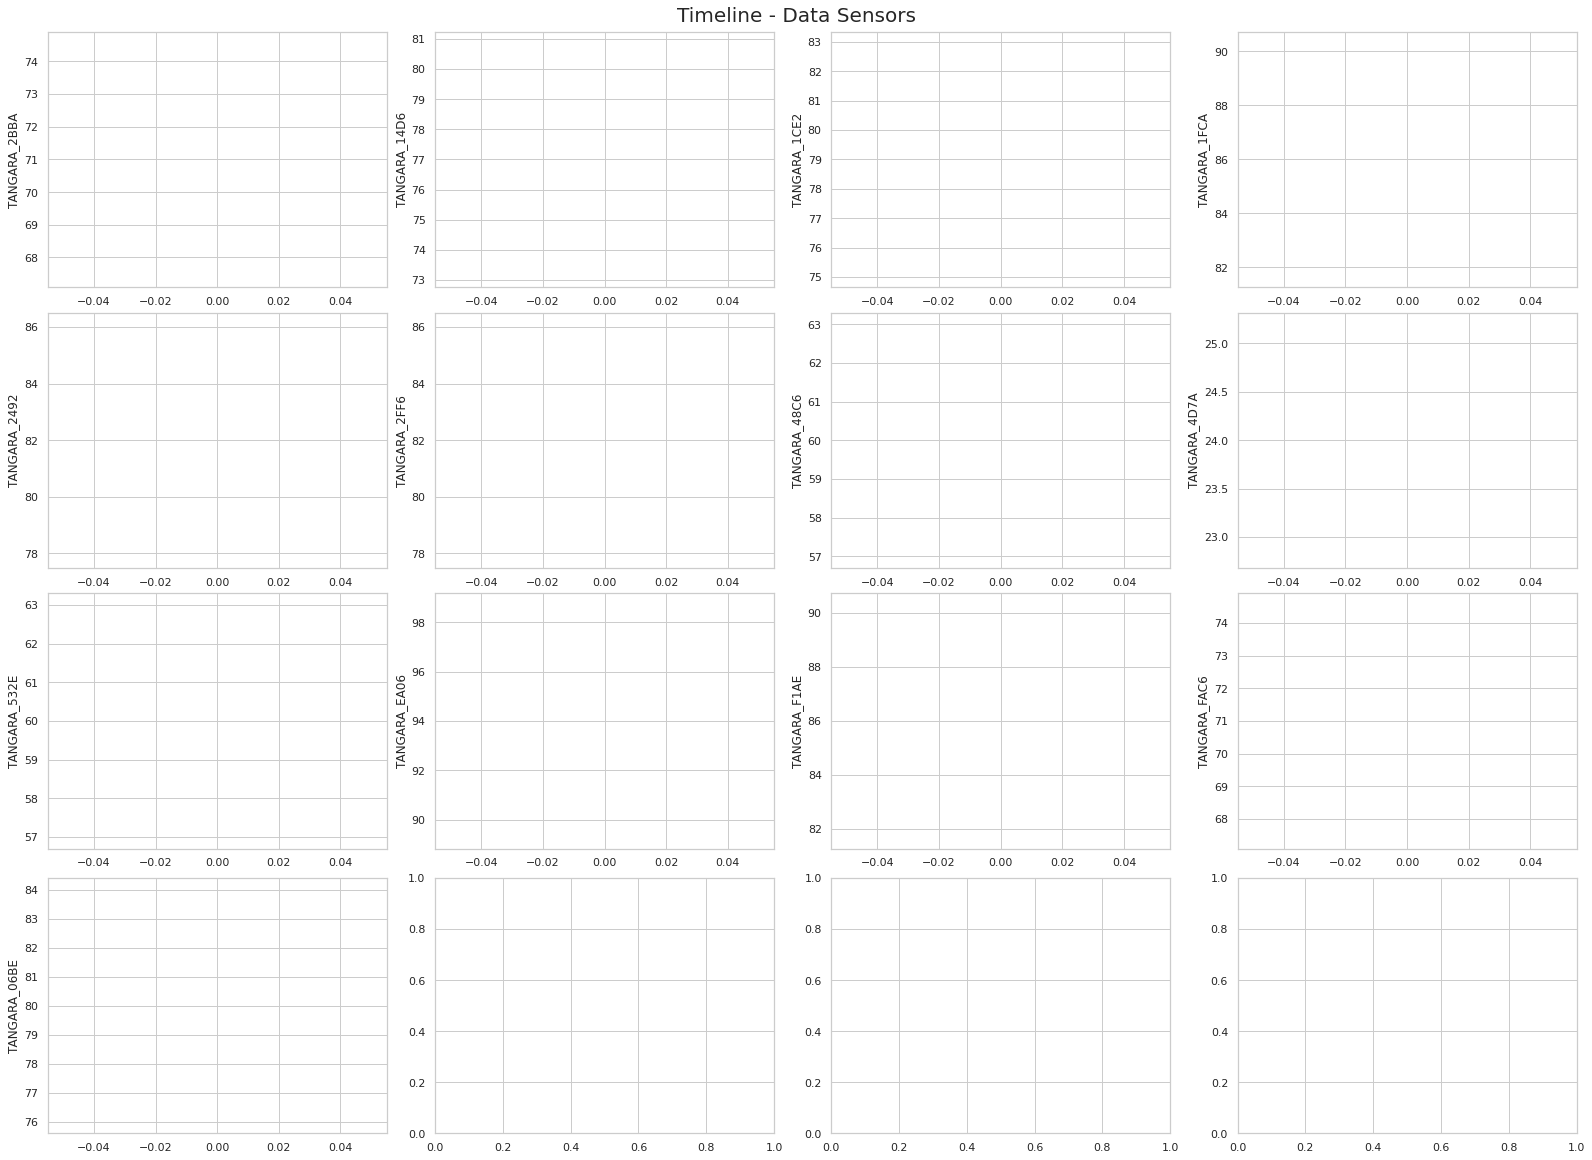

In [9]:
# Plot Lineplots
aqi.lineplots(aqi_last_24h)

In [10]:
# Save aqi_last_24h into Catalog
catalog.save('aqi_last_24h', aqi_last_24h)

2022-09-10 16:57:19,500 - kedro.io.data_catalog - INFO - Saving data to `aqi_last_24h` (CSVDataSet)...
